In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_reporting_spectra.csv",sep="\t")
df.head()

,ID,MJD,Energy,Unnamed: 3,Flux,2.09848E+22,Model,nH,index_1,norm_1,...,chi sq/dof,index_1_err,norm_1_err,highecut_err,folding energy_err,index_2_err,norm_2_err,const_1_err,const_2_err,const_3_err
0,P050427900101,60152.0,28 keV,NaN,NaN,NaN,cutoffpl,1.1,1.16842,1.20029,...,1325.46/1164,"(-0.00979974, 0.00978233)","(-0.0133868, 0.0135077)","(-0.567506, 0.591471)",NaN,NaN,NaN,NaN,"(-0.0068567, 0.00691248)",NaN
1,P050427900103,60153.0,28 keV,NaN,NaN,NaN,cutoffpl,1.1,1.21645,1.34112,...,1306.11/1164,"(-0.0081793, 0.00816712)","(-0.0122702, 0.0123634)","(-0.590365, 0.614562)",NaN,NaN,NaN,NaN,"(-0.00604194, 0.00608379)",NaN
2,P050427900104,60153.0,28 keV,NaN,NaN,NaN,cutoffpl,1.1,1.20025,1.26361,...,1350.16/1164,"(-0.00910554, 0.00909071)","(-0.0130184, 0.013128)","(-0.57775, 0.601851)",NaN,NaN,NaN,NaN,"(-0.006575, 0.0066248)",NaN
3,P050419600101,60154.0,28 keV,NaN,NaN,NaN,cutoffpl,1.1,1.17677,1.18504,...,1277.82/1164,"(-0.010371, 0.0103509)","(-0.013877, 0.0140103)","(-0.642178, 0.672808)",NaN,NaN,NaN,NaN,"(-0.00743205, 0.00749522)",NaN
4,P050419600102,60154.0,28 keV,NaN,NaN,NaN,cutoffpl,1.1,1.19395,1.18809,...,1308.54/1164,"(-0.0135659, 0.0135319)","(-0.0181835, 0.0184116)","(-0.937035, 0.999268)",NaN,NaN,NaN,NaN,"(-0.00985835, 0.00997017)",NaN


In [126]:
df_2=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/nicer/reporting_spectra_iteration_2.csv",sep="\t")

df_2.columns

Index(['2.09848E+22', 'Flux (dist 6.8 kpc)', 'Lumin', 'MJD', 'Obs ID',
       'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
       'folding_energy', 'lineE', 'lineSigma', 'reduced/chi-sq', 'nH_err',
       'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
       'lineE_err', 'lineSigma_err'],
      dtype='object')

In [127]:
df_old=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/nicer/reporting_spectra_iteration_1.csv")

df_old.columns


Index(['comments', 'Flux (0.8-10.0)', 'Lumin', 'Chis-qaure for periodicity',
       'MJD', 'Obs ID', 'Continuum Model Extra', 'nH', 'nh_low', 'nh_hi', 'PI',
       'pi_low', 'pi_hi', 'norm', 'norm_low', 'norm_hi', 'kT', 'kt_low',
       'kt_hi', 'bbodyrad norm (disc radius proxy)', 'bbnorm_low', 'bbnorm_hi',
       'bbrad', 'bbrad_low', 'bbrad_hi', 'lineE', 'line_low', 'line_hi',
       'lineSigma', 'sigma_low', 'sigma_hi', 'reduced/chi-sq'],
      dtype='object')

In [128]:
def clean_nh_value(value):
    try:
        # Try converting to float
        return float(value)
    except ValueError:
        # Handle 'frozen' or other non-numeric cases
        return np.nan
df_2['nH'] = df_2['nH'].apply(clean_nh_value)
df_old['nH'] = df_old['nH'].apply(clean_nh_value)

In [129]:
# # Assuming yerr is already defined as:
# yerr = [np.abs(df_2['pi_low']), np.abs(df_2['pi_hi'])]

# # Create two subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# # First plot: Powerlaw photon index vs Luminosity
# axes[0].errorbar(df_2['Lumin'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='b', label='PI values')
# axes[0].set_title("Powerlaw Photon Index vs Luminosity", fontsize=12)
# axes[0].set_xlabel("Luminosity (erg/s)", fontsize=11)
# axes[0].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[0].grid(True, linestyle='--', alpha=0.6)
# axes[0].legend()

# # Second plot: Powerlaw photon index vs MJD
# axes[1].errorbar(df_2['MJD'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='r', label='PI values')
# axes[1].set_title("Powerlaw Photon Index vs MJD", fontsize=12)
# axes[1].set_xlabel("Modified Julian Date (MJD)", fontsize=11)
# axes[1].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[1].grid(True, linestyle='--', alpha=0.6)
# axes[1].legend()

# # Show the plots
# plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  45 non-null     object 
 1   MJD                 45 non-null     float64
 2   Energy              45 non-null     object 
 3   Unnamed: 3          1 non-null      object 
 4   Flux                1 non-null      float64
 5   2.09848E+22         1 non-null      float64
 6   Model               35 non-null     object 
 7   nH                  35 non-null     float64
 8   index_1             35 non-null     float64
 9   norm_1              35 non-null     float64
 10  highecut            35 non-null     float64
 11  folding_energy      16 non-null     float64
 12  index_2             0 non-null      float64
 13  norm_2              0 non-null      float64
 14  const_1             35 non-null     float64
 15  const_2             35 non-null     float64
 16  const_3   

In [131]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   2.09848E+22            23 non-null     object 
 1   Flux (dist 6.8 kpc)    50 non-null     float64
 2   Lumin                  50 non-null     float64
 3   MJD                    50 non-null     float64
 4   Obs ID                 50 non-null     int64  
 5   Continuum Model Extra  50 non-null     object 
 6   nH                     50 non-null     float64
 7   index                  50 non-null     float64
 8   norm                   50 non-null     float64
 9   highecut               17 non-null     float64
 10  folding_energy         17 non-null     float64
 11  lineE                  33 non-null     float64
 12  lineSigma              33 non-null     object 
 13  reduced/chi-sq         50 non-null     object 
 14  nH_err                 50 non-null     object 
 15  index_er

In [132]:
df = df[~(df['index_1'].isna() | (df['index_1'] == ''))]
# Add a sequential index if not already present
df = df.reset_index(drop=True)
df['seq'] = df.index  # sequential x-axis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  35 non-null     object 
 1   MJD                 35 non-null     float64
 2   Energy              35 non-null     object 
 3   Unnamed: 3          1 non-null      object 
 4   Flux                1 non-null      float64
 5   2.09848E+22         1 non-null      float64
 6   Model               35 non-null     object 
 7   nH                  35 non-null     float64
 8   index_1             35 non-null     float64
 9   norm_1              35 non-null     float64
 10  highecut            35 non-null     float64
 11  folding_energy      16 non-null     float64
 12  index_2             0 non-null      float64
 13  norm_2              0 non-null      float64
 14  const_1             35 non-null     float64
 15  const_2             35 non-null     float64
 16  const_3   

In [133]:
def convert_asymmetric_errors(df, error_columns):
    """
    Converts asymmetric error string columns in the form '(-low, +high)' into two float columns.
    
    Parameters:
    - df: pandas DataFrame
    - error_columns: list of column names (string) containing the error string
    
    Returns:
    - df: updated DataFrame with added _err_low and _err_high columns for each error column
    """
    for col in error_columns:
        low_vals, high_vals = [], []
        
        for val in df[col]:
            if pd.isna(val) or val == '—':
                low, high = np.nan, np.nan
            else:
                try:
                    low_str, high_str = val.strip('()').split(',')
                    low, high = abs(float(low_str)), abs(float(high_str))
                except Exception as e:
                    low, high = np.nan, np.nan  # fallback if malformed
            low_vals.append(low)
            high_vals.append(high)
        
        df[f"{col}_low"] = low_vals
        df[f"{col}_high"] = high_vals
    
    return df

error_cols = [col for col in df.columns if col.endswith('err')]

df = convert_asymmetric_errors(df, error_cols)

error_cols_2 = [col for col in df_2.columns if col.endswith('err')]

df_2 = convert_asymmetric_errors(df_2, error_cols_2)

error_cols_old = [col for col in df_old.columns if col.endswith('err')]

df_old = convert_asymmetric_errors(df_old, error_cols_old)

In [134]:
def plot_asymmetric_errorbars(
    df, x_col, y_col, yerr_low_col, yerr_high_col,
    xlabel=None, ylabel=None, title=None, figsize=(8, 5), color='tab:blue', marker='o'
):
    """
    Plots a scatter plot with asymmetric error bars using matplotlib.

    Parameters:
        df (pd.DataFrame): The dataframe containing your data
        x_col (str): Name of the x-axis column
        y_col (str): Name of the y-axis column
        yerr_low_col (str): Column with lower error values
        yerr_high_col (str): Column with upper error values
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
        title (str): Plot title
        figsize (tuple): Figure size
        color (str): Color of the markers and error bars
        marker (str): Marker style
    """
    x = df[x_col]
    y = df[y_col]
    yerr = np.array([df[yerr_low_col], df[yerr_high_col]])

    plt.figure(figsize=figsize)
    plt.errorbar(x, y, yerr=yerr, fmt=marker, ecolor=color, capsize=5, color=color, linestyle='None')
    plt.xlabel(xlabel or x_col)
    plt.ylabel(ylabel or y_col)
    plt.title(title or f'{y_col} vs {x_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [135]:
df_2 = df_2.reset_index(drop=True)
df_2['seq'] = df_2.index  # sequential x-axis
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2.09848E+22              23 non-null     object 
 1   Flux (dist 6.8 kpc)      50 non-null     float64
 2   Lumin                    50 non-null     float64
 3   MJD                      50 non-null     float64
 4   Obs ID                   50 non-null     int64  
 5   Continuum Model Extra    50 non-null     object 
 6   nH                       50 non-null     float64
 7   index                    50 non-null     float64
 8   norm                     50 non-null     float64
 9   highecut                 17 non-null     float64
 10  folding_energy           17 non-null     float64
 11  lineE                    33 non-null     float64
 12  lineSigma                33 non-null     object 
 13  reduced/chi-sq           50 non-null     object 
 14  nH_err                   50 

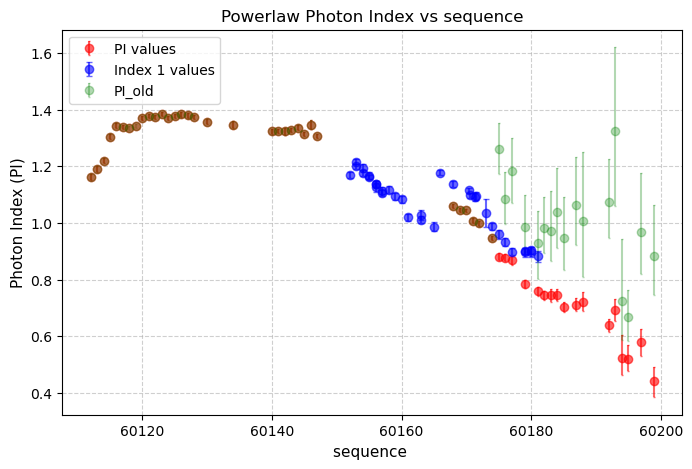

In [136]:
plt.figure(figsize=(8, 5))

yerr = [np.abs(df_2['index_err_low']), np.abs(df_2['index_err_high'])]
plt.errorbar(df_2['MJD'], df_2['index'], yerr=yerr, fmt='o', capsize=1, color='r', label='PI values',alpha=0.6)
yerr2 = np.array([df['index_1_err_low'], df['index_1_err_high']])
plt.errorbar(df['MJD'], df['index_1'], yerr=yerr2, fmt='o', capsize=2, color='b', label='Index 1 values', alpha=0.6)

yerr_old=[np.abs(df_old['pi_low']), np.abs(df_old['pi_hi'])]
plt.errorbar(df_old['MJD'], df_old['PI'], yerr=yerr_old, fmt='o', capsize=1, color='g', label='PI_old',alpha=0.3)

plt.title("Powerlaw Photon Index vs sequence", fontsize=12)
plt.xlabel("sequence ", fontsize=11)
plt.ylabel("Photon Index (PI)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
#plt.xlim(60150,60181)
plt.legend()
plt.show()

# plot_asymmetric_errorbars(
#     df,
#     x_col='seq',
#     y_col='index_1',
#     yerr_low_col='index_1_err_low',
#     yerr_high_col='index_1_err_high',
#     xlabel='Observation Index',
#     ylabel='Photon Index 1',
#     title='Photon Index 1 with Asymmetric Errors',
#     color='tab:green'
# )


In [137]:
df_old.columns

Index(['comments', 'Flux (0.8-10.0)', 'Lumin', 'Chis-qaure for periodicity',
       'MJD', 'Obs ID', 'Continuum Model Extra', 'nH', 'nh_low', 'nh_hi', 'PI',
       'pi_low', 'pi_hi', 'norm', 'norm_low', 'norm_hi', 'kT', 'kt_low',
       'kt_hi', 'bbodyrad norm (disc radius proxy)', 'bbnorm_low', 'bbnorm_hi',
       'bbrad', 'bbrad_low', 'bbrad_hi', 'lineE', 'line_low', 'line_hi',
       'lineSigma', 'sigma_low', 'sigma_hi', 'reduced/chi-sq'],
      dtype='object')

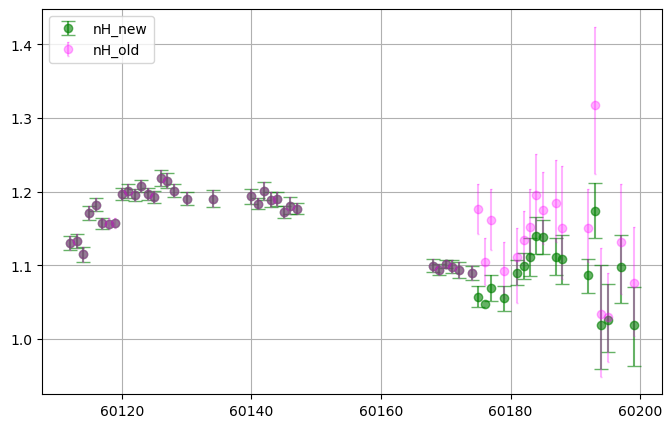

In [138]:
plt.figure(figsize=(8, 5))
nh_yerr = [np.abs(df_2['nH_err_low']), np.abs(df_2['nH_err_high'])]
plt.errorbar(df_2['MJD'], df_2['nH'], yerr=nh_yerr, fmt='o', capsize=5, color='g', label='nH_new',alpha=0.6)
nh_yerr_old=[np.abs(df_old['nh_low']), np.abs(df_old['nh_hi'])]
plt.errorbar(df_old['MJD'], df_old['nH'], yerr=nh_yerr_old, fmt='o', capsize=1, color='magenta', label='nH_old',alpha=0.3)
plt.legend()
plt.grid()


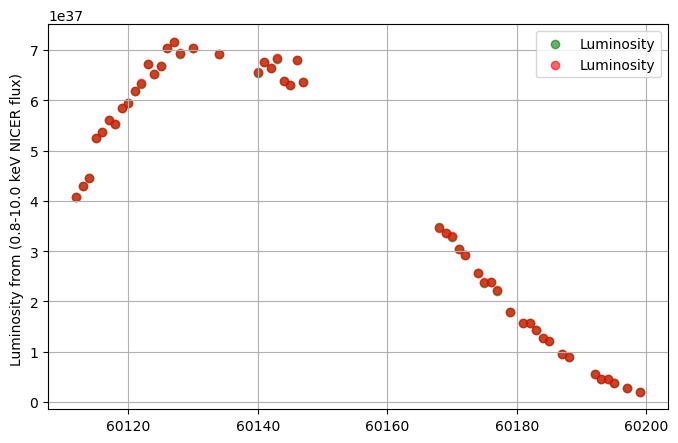

In [139]:
plt.figure(figsize=(8, 5))
plt.scatter(df_2['MJD'], df_2['Lumin'], color='g', label='Luminosity',alpha=0.6)
plt.scatter(df_old['MJD'], df_old['Lumin'], color='r', label='Luminosity',alpha=0.6)
plt.ylabel("Luminosity from (0.8-10.0 keV NICER flux) ")
plt.legend()
plt.grid()

In [145]:
df.columns

Index(['ID ', 'MJD', 'Energy', 'Unnamed: 3', 'Flux', '2.09848E+22', 'Model',
       'nH', 'index_1', 'norm_1', 'highecut', 'folding_energy', 'index_2',
       'norm_2', 'const_1', 'const_2', 'const_3', 'chi sq/dof', 'index_1_err',
       'norm_1_err', 'highecut_err', 'folding energy_err', 'index_2_err',
       'norm_2_err', 'const_1_err', 'const_2_err', 'const_3_err', 'seq',
       'index_1_err_low', 'index_1_err_high', 'norm_1_err_low',
       'norm_1_err_high', 'highecut_err_low', 'highecut_err_high',
       'folding energy_err_low', 'folding energy_err_high', 'index_2_err_low',
       'index_2_err_high', 'norm_2_err_low', 'norm_2_err_high',
       'const_1_err_low', 'const_1_err_high', 'const_2_err_low',
       'const_2_err_high', 'const_3_err_low', 'const_3_err_high'],
      dtype='object')

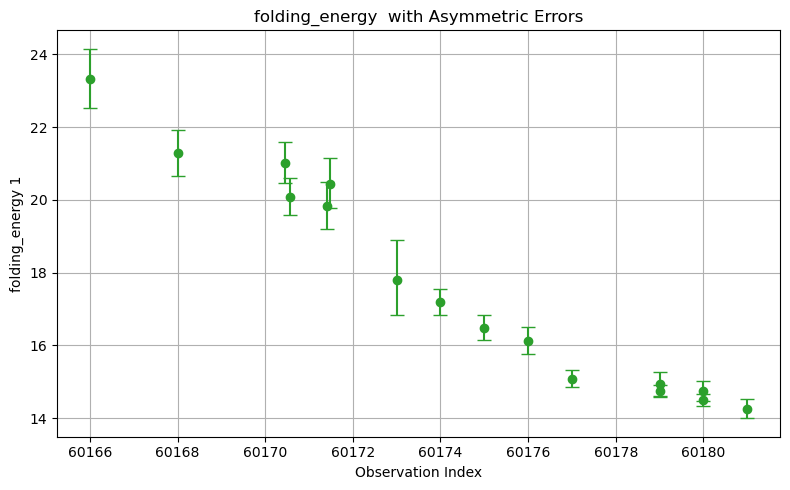

In [146]:
plot_asymmetric_errorbars(
    df,
    x_col='MJD',
    y_col='folding_energy',
    yerr_low_col='folding energy_err_low',
    yerr_high_col='folding energy_err_high',
    xlabel='Observation Index',
    ylabel='folding_energy 1',
    title='folding_energy  with Asymmetric Errors',
    color='tab:green'
)


Text(0.5, 1.0, 'Powerlaw Photon Index vs sequence')

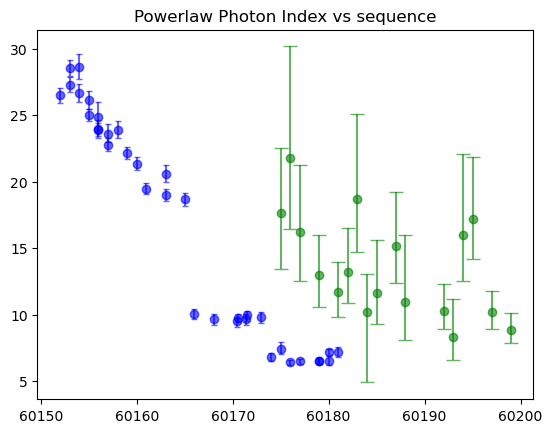

In [150]:
yerr_folding = [np.abs(df_2['folding_energy_err_low']), np.abs(df_2['folding_energy_err_high'])]
plt.errorbar(df_2['MJD'], df_2['folding_energy'], yerr=yerr_folding, fmt='o', capsize=5, color='g', label='nH_new',alpha=0.6)
yerr_high2 = np.array([df['highecut_err_low'], df['highecut_err_high']])
plt.errorbar(df['MJD'], df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='b', label='Index 1 values', alpha=0.6)
plt.title("Powerlaw Photon Index vs sequence", fontsize=12)

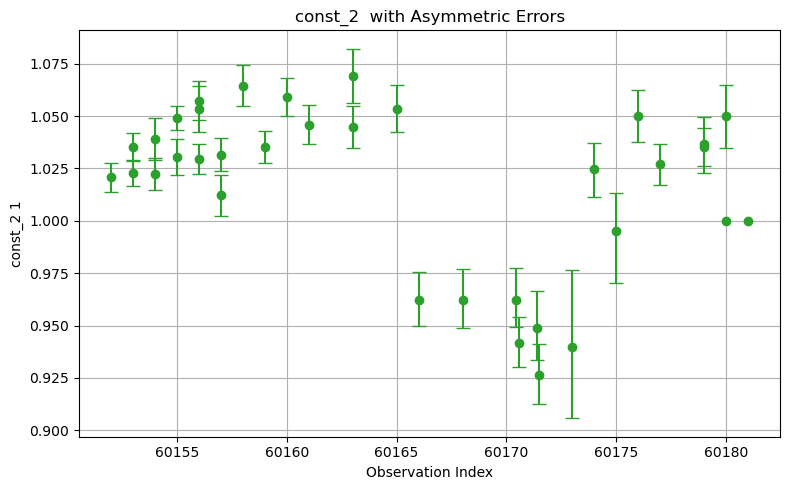

In [141]:
plot_asymmetric_errorbars(
    df,
    x_col='MJD',
    y_col='const_2',
    yerr_low_col='const_2_err_low',
    yerr_high_col='const_2_err_high',
    xlabel='Observation Index',
    ylabel='const_2 1',
    title='const_2  with Asymmetric Errors',
    color='tab:green'
)
